<a href="https://colab.research.google.com/github/cliu001/machine-learning/blob/main/breast_cancer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Number of samples: 569
Number of features: 30
Number of classes: 2
Training set size: 455
Testing set size: 114
Accuracy: 0.9386
Confusion Matrix:
[[32  6]
 [ 1 75]]
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.84      0.90        38
           1       0.93      0.99      0.96        76

    accuracy                           0.94       114
   macro avg       0.95      0.91      0.93       114
weighted avg       0.94      0.94      0.94       114



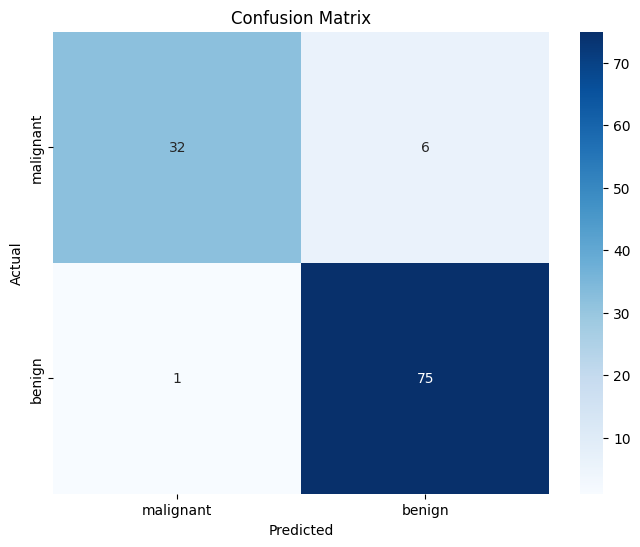

Cross-validated Scores:
[0.96491228 0.9122807  0.94736842 0.89473684 0.96491228 0.94736842
 0.96491228 0.89473684 0.96491228 0.92857143]
Mean Accuracy: 0.9385
Running GaussianNB...
Accuracy for GaussianNB: 0.9386
Confusion Matrix for GaussianNB:
[[32  6]
 [ 1 75]]
Classification Report for GaussianNB:
              precision    recall  f1-score   support

           0       0.97      0.84      0.90        38
           1       0.93      0.99      0.96        76

    accuracy                           0.94       114
   macro avg       0.95      0.91      0.93       114
weighted avg       0.94      0.94      0.94       114



Running KNeighborsClassifier...
Accuracy for KNeighborsClassifier: 0.9474
Confusion Matrix for KNeighborsClassifier:
[[33  5]
 [ 1 75]]
Classification Report for KNeighborsClassifier:
              precision    recall  f1-score   support

           0       0.97      0.87      0.92        38
           1       0.94      0.99      0.96        76

    accuracy        

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import KFold, cross_val_score


# Step 1: Loading the Dataset
breast_cancer = load_breast_cancer()
X, y = breast_cancer.data, breast_cancer.target
# Step 2: Checking the Sample and Target Sizes
print(f"Number of samples: {X.shape[0]}")
print(f"Number of features: {X.shape[1]}")
print(f"Number of classes: {len(set(y))}")

# Step 3: Splitting the Data for Training and Testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=11)


# Step 4: Training and Testing Set Sizes
print(f"Training set size: {X_train.shape[0]}")
print(f"Testing set size: {X_test.shape[0]}")

# Step 5: Creating the Model
nb = GaussianNB()

# Step 6: Training the Model
nb.fit(X_train, y_train)

# Step 7: Predicting
y_pred = nb.predict(X_test)

# Step 8: Estimator Method score
accuracy = nb.score(X_test, y_test)
print(f"Accuracy: {accuracy:.4f}")

# Step 9: Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Step 10: Classification Report
class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)

# Step 11: Visualizing the Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=breast_cancer.target_names,
            yticklabels=breast_cancer.target_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
# Step 12: K-Fold Cross-Validation
kfold = KFold(n_splits=10, random_state=11, shuffle=True)
scores = cross_val_score(estimator=nb, X=breast_cancer.data,
          y=breast_cancer.target, cv=kfold)
print("Cross-validated Scores:")
print(scores)
print(f"Mean Accuracy: {scores.mean():.4f}")

# Define a dictionary of classifiers
estimators = {
    'GaussianNB': GaussianNB(),
    'KNeighborsClassifier': KNeighborsClassifier(),
    'LogisticRegression': LogisticRegression(solver='lbfgs', multi_class='ovr', max_iter=10000),
    'SVC': SVC(gamma='scale')
}



# Initialize variables to keep track of the best model and its accuracy
best_model = None
best_accuracy = 0

# Running Multiple Models to Find the Best One
for name, estimator in estimators.items():
    print(f"Running {name}...")
    estimator.fit(X_train, y_train)
    y_pred = estimator.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy for {name}: {accuracy:.4f}")

    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model = name

    conf_matrix = confusion_matrix(y_test, y_pred)
    print(f"Confusion Matrix for {name}:")
    print(conf_matrix)

    class_report = classification_report(y_test, y_pred)
    print(f"Classification Report for {name}:")
    print(class_report)
    print("\n")

# Print the best model
print(f"The best model is {best_model} with an accuracy of {best_accuracy:.4f}")


